In [4]:
class Pieza():
    
    # Constructor
    def __init__(self,index, largo, ancho):
        self.__index = index
        self.__Xo = 0
        self.__Yo = 0
        self.__largo = largo
        self.__ancho = ancho
        self.__area = largo*ancho
        self.__estado = 'N'
    
    # Metodos    
    def Informar(self):
        print(str(self.__index)+" : "+str(self.__Xo)+" , "+str(self.__Yo)+" , "+str(self.__estado))
        
    
    def Girar(self):
        aux = self.__largo
        self.__largo = self.__ancho
        self.__ancho = aux
        self.__estado = 'N' if (self.__estado == 'G') else 'G'
        
    def Get_area(self):
        return self.__area
    
    def Get_largo(self):
        return self.__largo
    
    def Get_ancho(self):
        return self.__ancho
    
    def Get_index(self):
        return self.__index
    
    def Get_estado(self):
        return self.__estado
    
    def Get_Xo(self):
        return self.__Xo
        
    def Get_Yo(self):
        return self.__Yo
    
    def Set_Xo(self, Xo):
        self.__Xo = Xo
        
    def Set_Yo(self, Yo):
        self.__Yo = Yo
     

In [5]:
def DataSet(data_name):
    with open(data_name) as f:
        w, h = [int(x) for x in next(f).split()] # read first line

        array = []
        for line in f: # read rest of lines
            array.append([x for x in line.split()])

    #Agregar
    formas = []
    arr = []
    for i in range(1,len(array)):
        for j in range(int(array[i][3])):
            arr.append(Pieza(array[i][0]+str(j+1),int(array[i][1]),int(array[i][2])))
    formas.append(arr)
    
    return w,h,formas


A1 : 0 , 0 , N
A2 : 0 , 0 , N
A3 : 0 , 0 , N
B1 : 0 , 0 , N
B2 : 0 , 0 , N


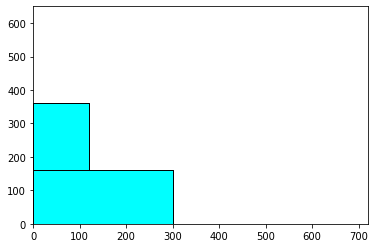

In [8]:
"""
largoTotal = input(" Ingrese largo de la plancha :")
anchoTotal = input(" Ingrese ancho de la plancha :")

N = input("Cantidad de Piezas :")
n , piezas = 1 , []


# Imput valores
while n <= int(N):
    arr = []
    index = input(" Ingrese index :")
    largo = input(" Ingrese largo :")
    ancho = input(" Ingrese ancho :")
    cantidad = input(" Ingrese cantidad :")
    print("  ")
    
    for i in range(int(cantidad)):
        arr.append(Pieza(index+str(i+1),int(largo),int(ancho)))
    piezas.append(arr)
    
    n=n+int(cantidad)
    
"""

#DataSet (.txt)
largoTotal, anchoTotal, piezas = DataSet("DataExample.txt")    

# -> TODO: Colocar Algoritmo de Empaquetamiento ...
    
# Informar Piezas
for i in range(len(piezas)):
    for j in range(len(piezas[i])):
        piezas[i][j].Informar()

# Mostrar Piezas       
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

codes = [
    Path . MOVETO ,
    Path . LINETO ,
    Path . LINETO ,
    Path . LINETO ,
    Path . CLOSEPOLY ,
]

fig , ax = plt . subplots ()

for i in range(len(piezas)):
    for j in range(len(piezas[i])):

        verts = [
           ( piezas[i][j].Get_Xo() , piezas[i][j].Get_Yo() ),  # Xo , Yo
           ( piezas[i][j].Get_Xo() , piezas[i][j].Get_Yo() + piezas[i][j].Get_ancho() ),  # Xo , Yo + ancho
           ( piezas[i][j].Get_Xo() + piezas[i][j].Get_largo() , piezas[i][j].Get_Yo() + piezas[i][j].Get_ancho()),  # Xo + largo , Yo + ancho
           ( piezas[i][j].Get_Xo() + piezas[i][j].Get_largo() , piezas[i][j].Get_Yo() ),  # Xo +largo , Yo
           ( 0. , 0. ),  # Ignorar
        ]

        path = Path ( verts , codes )

        patch = patches . PathPatch ( path , facecolor = 'cyan' , lw = 1 )
        ax . add_patch ( patch )
    
ax . set_xlim ( 0 , int(largoTotal) )
ax . set_ylim ( 0 , int(anchoTotal) )
plt . show ()
